In [31]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [32]:
file_path = '/Users/albertwv/Desktop/MSDWeekly/exercise.09/fundata.json'
with open(file_path) as f:
    data = json.load(f)

In [33]:
df = pd.DataFrame(data)

In [34]:
df

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[-4.9051185, 1.1807523, 0.8316655]",2,1,Linear Acceleration Sensor,10,34804624015000
1,3,"[6.426337, 9.091084, 10.09186]",2,1,LSM6DSO Accelerometer,1,34805405635680
2,3,"[-4.596216, -0.06004572, 1.4463348]",2,1,Linear Acceleration Sensor,10,34804985094000
3,3,"[1.7666986, 0.78984874, 0.34788775]",2,1,LSM6DSO Gyroscope,4,34806429070349
4,3,"[0.533279, -0.112179, 0.36255, 0.756033, -1.0]",2,1,Samsung Rotation Vector,11,34805165600666
...,...,...,...,...,...,...,...
196,3,"[0.04070143, 6.344934, 6.6130843]",2,1,LSM6DSO Accelerometer,1,34811823119255
197,3,"[-0.049403727, -0.025045475, 0.067500606]",2,1,LSM6DSO Gyroscope,4,34811844097367
198,3,"[-0.0021, -0.380281, -0.886573, 0.26338, -1.0]",2,1,Samsung Rotation Vector,11,34811844097367
199,3,"[-1.9602516, -0.25678062, -0.3571291]",2,1,Linear Acceleration Sensor,10,34811844097367


In [35]:
df.describe()

,accuracy,experimentId,patientId,sensorType,timestamp
count,201.0,201.0,201.0,201.000000,2.010000e+02
mean,3.0,2.0,1.0,5.597015,3.480817e+13
std,0.0,0.0,0.0,4.319930,2.187217e+09
min,3.0,2.0,1.0,1.000000,3.480444e+13
25%,3.0,2.0,1.0,1.000000,3.480625e+13
50%,3.0,2.0,1.0,4.000000,3.480821e+13
75%,3.0,2.0,1.0,10.000000,3.481004e+13
max,3.0,2.0,1.0,11.000000,3.481192e+13


In [36]:
df["sensorId"].unique()

array(['Linear Acceleration Sensor', 'LSM6DSO Accelerometer',
       'LSM6DSO Gyroscope', 'Samsung Rotation Vector'], dtype=object)

In [37]:
df = df.sort_values(by='timestamp').reset_index(drop=True)
df.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[-3.7372365, -6.1586776, 2.9958954]",2,1,Linear Acceleration Sensor,10,34804443546000
1,3,"[0.366499, -0.194161, 0.066797, 0.907478, -1.0]",2,1,Samsung Rotation Vector,11,34804443546000
2,3,"[-0.31757358, -0.35002577, 0.1432479]",2,1,LSM6DSO Gyroscope,4,34804443546000
3,3,"[-0.08140286, 6.8285627, 7.0057335]",2,1,LSM6DSO Accelerometer,1,34804503287817
4,3,"[-0.47405192, 7.1230493, 7.252336]",2,1,LSM6DSO Accelerometer,1,34804603544617


In [38]:
df['timestamp'] = df['timestamp'] / 1000000000

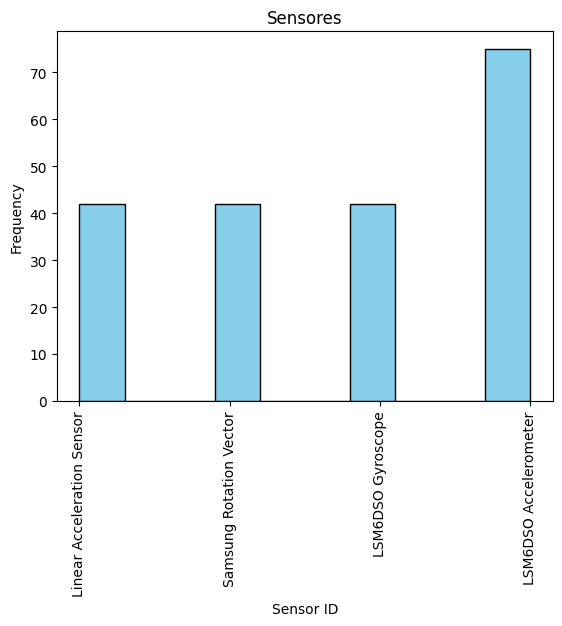

In [39]:
plt.hist(df['sensorId'], bins=10, color='skyblue', edgecolor='black')
plt.title('Sensores')
plt.xlabel('Sensor ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [40]:
sensor_counts = df['sensorId'].value_counts()
sensor_counts

sensorId
LSM6DSO Accelerometer         75
Linear Acceleration Sensor    42
Samsung Rotation Vector       42
LSM6DSO Gyroscope             42
Name: count, dtype: int64

In [41]:
# Calculating acceleration of the 3 axis
def calculate_magnitude(data):
    return np.sqrt(np.sum(np.square(data), axis=1))

In [43]:
# Linear acceleration
linear_accel_data = df[df['sensorId'] == 'Linear Acceleration Sensor']
linear_accel_data = linear_accel_data.reset_index(drop=True)
# Calculate magnitude of acceleration
linear_accel_data['magnitude'] = calculate_magnitude(np.array(linear_accel_data['data'].tolist()))

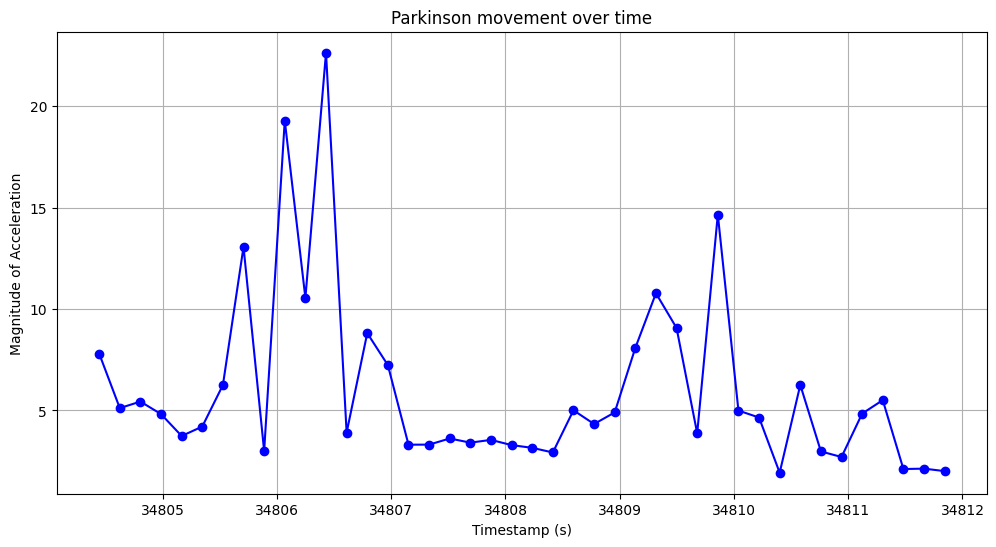

In [47]:
# Analyzing shakey movement over time
plt.figure(figsize=(12, 6))
plt.plot(linear_accel_data['timestamp'], linear_accel_data['magnitude'], color='blue', linestyle='-', marker='o')
plt.title('Parkinson movement over time')
plt.xlabel('Timestamp (s)')
plt.ylabel('Magnitude of Acceleration')
plt.grid(True)
plt.show()